In [1]:
# Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler

# Data exploration
- Summarize the dataset (missing values, outliers, etc.).
- Analyze patterns or trends in the data. For instance, do customers on lower-tier plans churn more frequently?


In [2]:
# Unzipping the Telco churn dataset folder downloaded from Kaggle
!unzip archive.zip

Archive:  archive.zip
replace WA_Fn-UseC_-Telco-Customer-Churn.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [3]:
# Reading the dataset into Pandas dataframe
data=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
# Inspecting the first few rows of the dataset
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
# No missing values found.

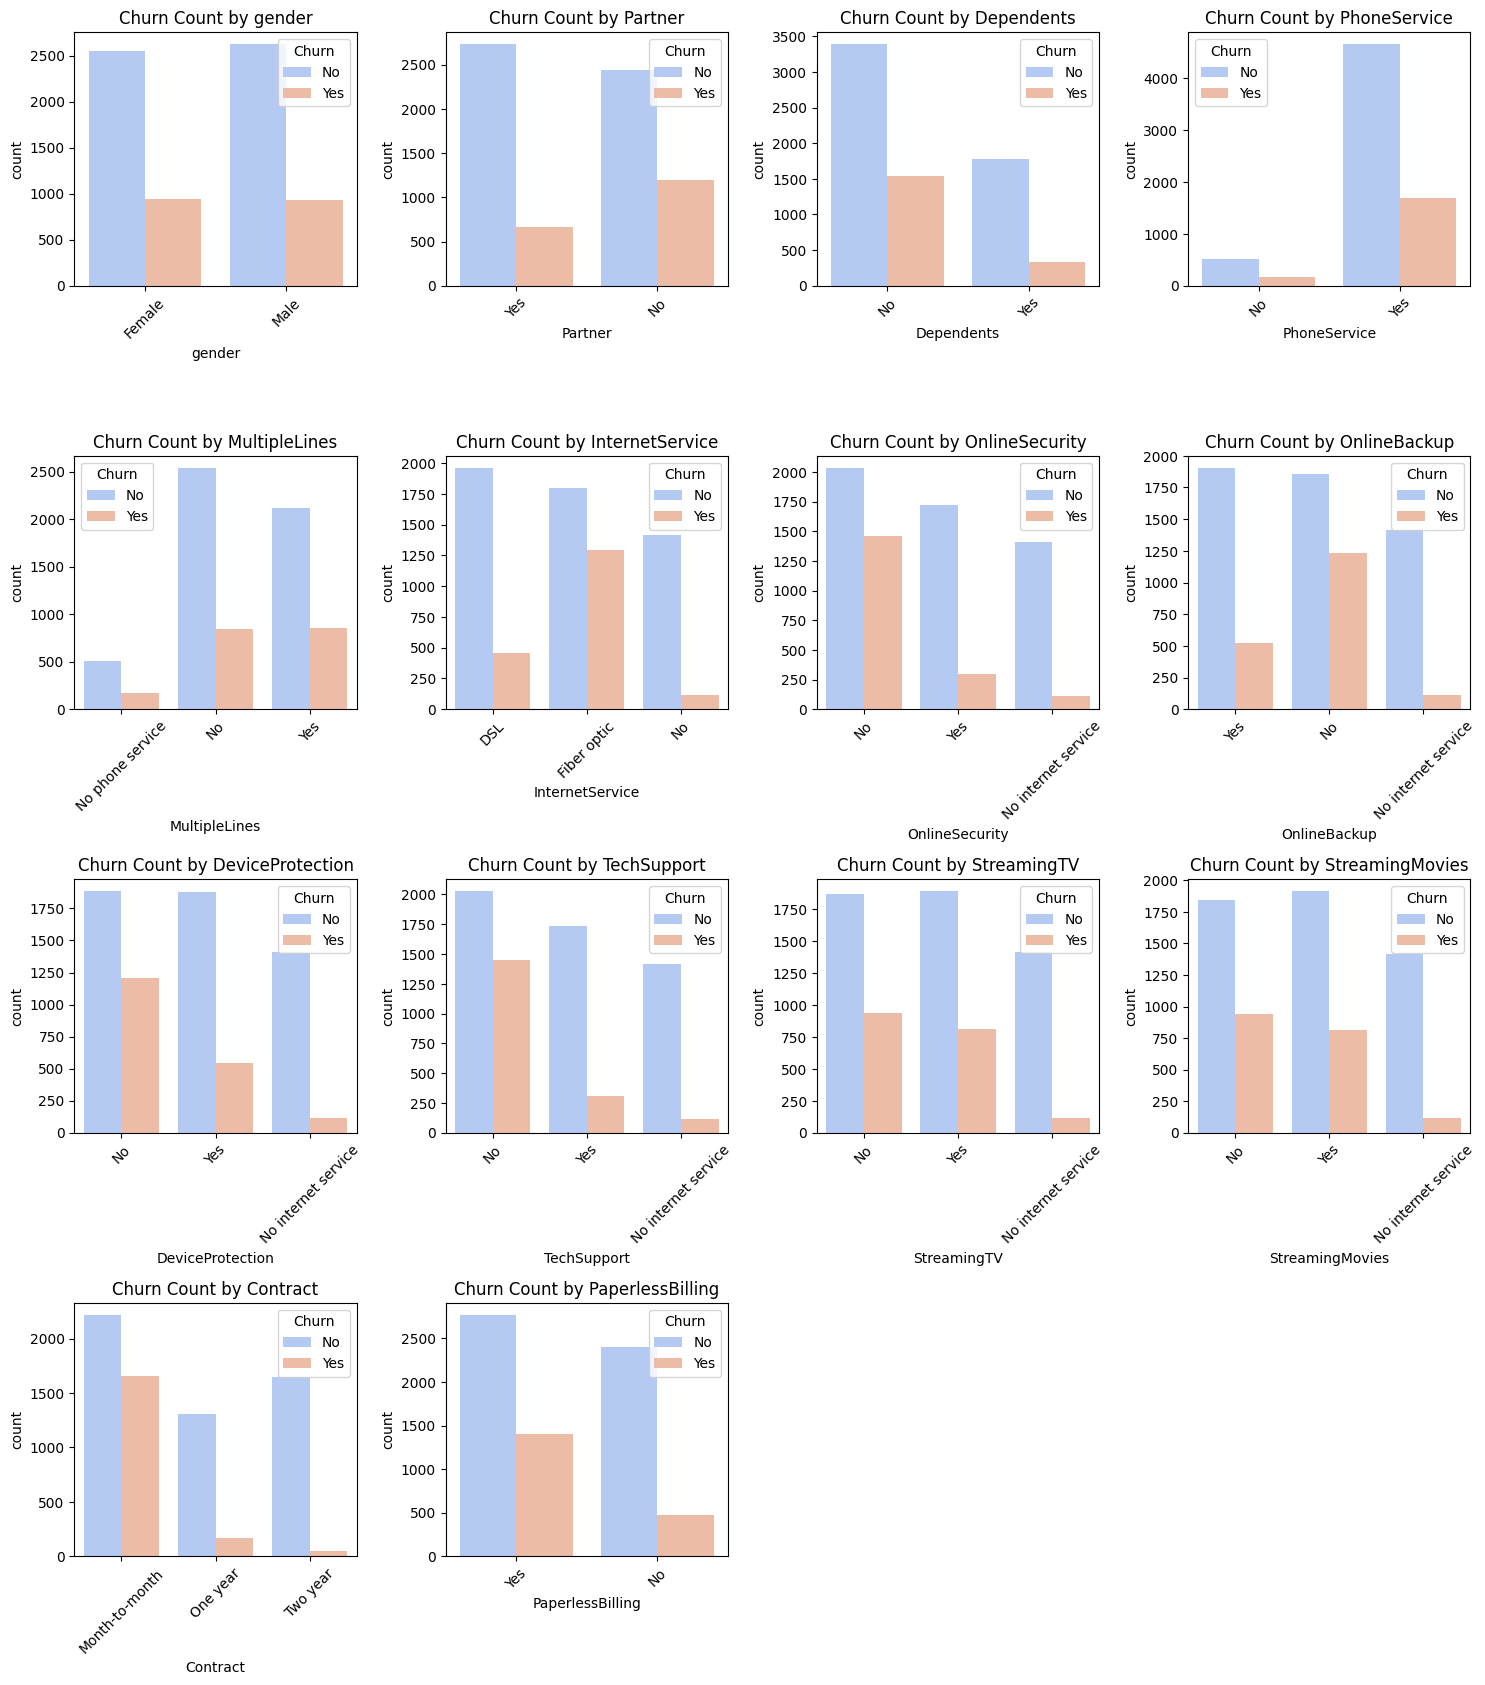

In [8]:
# Analysing trends using countplots
Categorical_columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',]
plt.figure(figsize=(15, 20))
for i, feature in enumerate(Categorical_columns, 1):
    plt.subplot(5, 4, i)
    sns.countplot(x=feature, hue="Churn", data=data, palette="coolwarm")
    plt.xticks(rotation=45)
    plt.title(f"Churn Count by {feature}")

plt.tight_layout()
plt.show()


# Data Cleaning & Preprocessing:
  - Handle missing or inconsistent data.
  - Normalize numerical features (e.g. Monthly Charges, Total Usage Hours).
  - Encode categorical variables (e.g., Gender, Subscription Plan).

In [9]:
# Check for duplicates and remove them.
print(data.duplicated().sum())
data = data.drop_duplicates()


0


In [10]:
# Converting the TotalCharges column to numerical and churn to integer
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors="coerce")
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0}).astype(int)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
# Again checking for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [13]:
# Dropping null values
data=data.dropna()

In [14]:
# Getting the unique values of each column.
for column in data.columns:
    unique_values = data[column].unique()
    print(f"\nUnique values in column '{column}':")
    print(unique_values)


Unique values in column 'customerID':
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique values in column 'gender':
['Female' 'Male']

Unique values in column 'SeniorCitizen':
[0 1]

Unique values in column 'Partner':
['Yes' 'No']

Unique values in column 'Dependents':
['No' 'Yes']

Unique values in column 'tenure':
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]

Unique values in column 'PhoneService':
['No' 'Yes']

Unique values in column 'MultipleLines':
['No phone service' 'No' 'Yes']

Unique values in column 'InternetService':
['DSL' 'Fiber optic' 'No']

Unique values in column 'OnlineSecurity':
['No' 'Yes' 'No internet service']

Unique values in column 'OnlineBackup':
['Yes' 'No' 'No internet service']

Unique values in column 'DeviceProtection':
['No' 'Yes' 'No inter

In [15]:
# Encoding categoricaL Columns
df=pd.get_dummies(data,columns=Categorical_columns)
df

,customerID,SeniorCitizen,tenure,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes
0,7590-VHVEG,0,1,Electronic check,29.85,29.85,0,True,False,False,...,False,False,True,False,False,True,False,False,False,True
1,5575-GNVDE,0,34,Mailed check,56.95,1889.50,0,False,True,True,...,False,False,True,False,False,False,True,False,True,False
2,3668-QPYBK,0,2,Mailed check,53.85,108.15,1,False,True,True,...,False,False,True,False,False,True,False,False,False,True
3,7795-CFOCW,0,45,Bank transfer (automatic),42.30,1840.75,0,False,True,True,...,False,False,True,False,False,False,True,False,True,False
4,9237-HQITU,0,2,Electronic check,70.70,151.65,1,True,False,True,...,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,Mailed check,84.80,1990.50,0,False,True,False,...,False,True,False,False,True,False,True,False,False,True
7039,2234-XADUH,0,72,Credit card (automatic),103.20,7362.90,0,True,False,False,...,False,True,False,False,True,False,True,False,False,True
7040,4801-JZAZL,0,11,Electronic check,29.60,346.45,0,True,False,False,...,False,False,True,False,False,True,False,False,False,True
7041,8361-LTMKD,1,4,Mailed check,74.40,306.60,1,False,True,False,...,False,False,True,False,False,True,False,False,False,True


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 44 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customerID                            7032 non-null   object 
 1   SeniorCitizen                         7032 non-null   int64  
 2   tenure                                7032 non-null   int64  
 3   PaymentMethod                         7032 non-null   object 
 4   MonthlyCharges                        7032 non-null   float64
 5   TotalCharges                          7032 non-null   float64
 6   Churn                                 7032 non-null   int64  
 7   gender_Female                         7032 non-null   bool   
 8   gender_Male                           7032 non-null   bool   
 9   Partner_No                            7032 non-null   bool   
 10  Partner_Yes                           7032 non-null   bool   
 11  Dependents_No         

In [17]:
# Normalise numericaL columns
numerical_columns=["tenure","MonthlyCharges","TotalCharges"]
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


#  Model Development:
*  Split the dataset into training and testing sets.
- Train a classification model (e.g., Logistic Regression, Random Forest, or Gradient Boosting).
- Evaluate the model using metrics like accuracy, precision, recall, and F1-score.



In [18]:
data.Churn.value_counts()
# Unbalanced dataset

,count
Churn,
0,5163
1,1869


In [19]:
# Seperate data into features and label
features=df.iloc[:, [1,2,4,5]].values
label=df.iloc[:,6].values

In [20]:
# Define alpha values and train Logistic Regression model

import warnings
warnings.filterwarnings("ignore")

SL = 0.2
CL = 1 - SL
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

for rs in range(1,100):
  X_train,X_test,y_train,y_test = train_test_split(features,
                                                   label,
                                                   test_size=0.2,
                                                   random_state=rs)

  model = LogisticRegression()
  model.fit(X_train,y_train)
  trainScore = model.score(X_train,y_train)
  testScore = model.score(X_test,y_test)

  if testScore > trainScore and testScore >= CL:
    print(f"TestScore is {testScore}, trainScore is {trainScore}, rs is {rs}")

TestScore is 0.8102345415778252, trainScore is 0.7870222222222222, rs is 6
TestScore is 0.8116560056858564, trainScore is 0.7873777777777777, rs is 9
TestScore is 0.8045486851457001, trainScore is 0.7877333333333333, rs is 10
TestScore is 0.8038379530916845, trainScore is 0.7880888888888888, rs is 14
TestScore is 0.8045486851457001, trainScore is 0.7882666666666667, rs is 17
TestScore is 0.8002842928216063, trainScore is 0.7895111111111112, rs is 24
TestScore is 0.8002842928216063, trainScore is 0.7888, rs is 27
TestScore is 0.8017057569296375, trainScore is 0.7896888888888889, rs is 28
TestScore is 0.8009950248756219, trainScore is 0.7893333333333333, rs is 39
TestScore is 0.8002842928216063, trainScore is 0.7896888888888889, rs is 46
TestScore is 0.8031272210376688, trainScore is 0.7870222222222222, rs is 55
TestScore is 0.8002842928216063, trainScore is 0.7873777777777777, rs is 62
TestScore is 0.8059701492537313, trainScore is 0.7882666666666667, rs is 64
TestScore is 0.80170575692

In [21]:
#Check whether to approve the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test = train_test_split(features,
                                                   label,
                                                   test_size=0.2,
                                                   random_state=6)

model1 = LogisticRegression()
model1.fit(X_train,y_train)
trainScore1 = model1.score(X_train,y_train)
testScore1 = model1.score(X_test,y_test)

In [22]:
print(f"TestScore is {testScore1}, trainScore is {trainScore1}")

TestScore is 0.8102345415778252, trainScore is 0.7870222222222222


In [23]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(label,model1.predict(features)))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      5163
           1       0.66      0.45      0.53      1869

    accuracy                           0.79      7032
   macro avg       0.74      0.68      0.70      7032
weighted avg       0.78      0.79      0.78      7032



# Insights & Recommendations:
*  Identify key factors driving churn (e.g., higher churn rates for customers with fewer usage hours).
*  Suggest retention strategies, such as offering discounts to at-risk customers or improving customer support.


In [25]:
"""
Key Factors Driving Churn:
1. Internet Service Type:

Fiber optic users have a significantly higher churn rate compared to DSL and no internet service.
This could indicate dissatisfaction with service quality or pricing for fiber optic users.

2. Online Security & Tech Support:

Customers who do not have online security or tech support are more likely to churn.
This suggests that security and technical assistance play a key role in retention.

3. Online Backup & Device Protection:

Higher churn is seen among customers without online backup or device protection.
Lack of these services might make customers feel unprotected or dissatisfied.

4. Streaming Services (TV & Movies):

Churn rates are higher for those without streaming services, indicating that entertainment offerings may not be a strong retention factor.
Customers may seek alternative streaming platforms, reducing their need for bundled services.

Retention Strategies:
1. Targeted Discounts & Promotions:

Offer discounted rates or promotional bundles for fiber optic users to improve satisfaction.
Provide incentives for customers to subscribe to online security, tech support, and device protection.

2. Enhanced Customer Support:

Proactively engage customers without tech support by offering free trials or discounted assistance packages.
Improve response time and effectiveness of customer service to reduce frustration.

3. Service Bundling:

Encourage customers to subscribe to multiple services (e.g., streaming, backup, security) through bundled pricing.
Offer limited-time deals for users with only basic services to upgrade.

4. Personalized Engagement:

Identify at-risk customers based on churn trends and send proactive retention emails or special loyalty rewards.
Use AI-driven chatbots or human agents to reach out to customers with high churn risk for personalized offers."""

'\nKey Factors Driving Churn:\n1. Internet Service Type:\n\nFiber optic users have a significantly higher churn rate compared to DSL and no internet service.\nThis could indicate dissatisfaction with service quality or pricing for fiber optic users.\n\n2. Online Security & Tech Support:\n\nCustomers who do not have online security or tech support are more likely to churn.\nThis suggests that security and technical assistance play a key role in retention.\n\n3. Online Backup & Device Protection:\n\nHigher churn is seen among customers without online backup or device protection.\nLack of these services might make customers feel unprotected or dissatisfied.\n\n4. Streaming Services (TV & Movies):\n\nChurn rates are higher for those without streaming services, indicating that entertainment offerings may not be a strong retention factor.\nCustomers may seek alternative streaming platforms, reducing their need for bundled services.\n\nRetention Strategies:\n1. Targeted Discounts & Promotions